In [ ]:
import pandas as pd
import os

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

os.chdir(r'path/to/repo') # Ammend this after cloning such that your CWD is the repo containing "myfuncs.py"
import myfuncs.myfuncs as mf

mf.read_directory(r"path/to/data") # This is a path to a CSV/Excel containg all the damage over time values

import warnings
warnings.filterwarnings('ignore')

In [89]:
def dps_plot():
    plt.title('DPS Over Time')
    plt.xlabel('Time (s)')
    plt.ylabel('DPS')
    plt.legend(title='Rotations')
    plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M DPS'))
    plt.grid(True)
    plt.show()

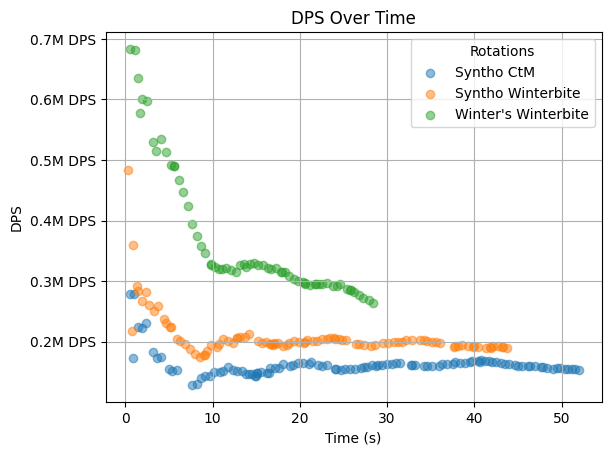

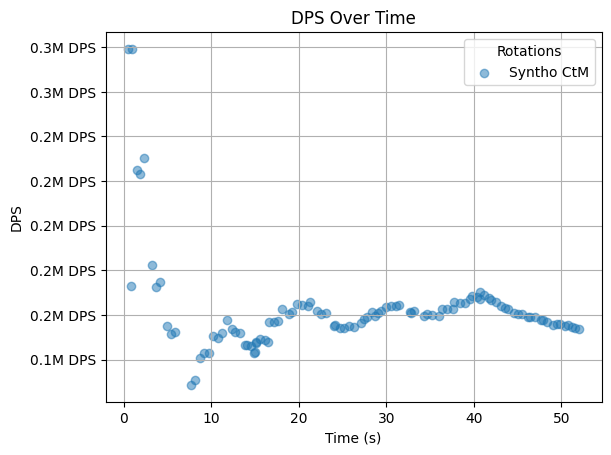

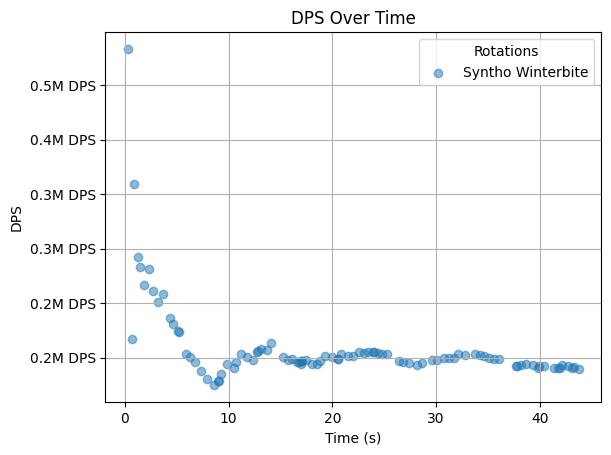

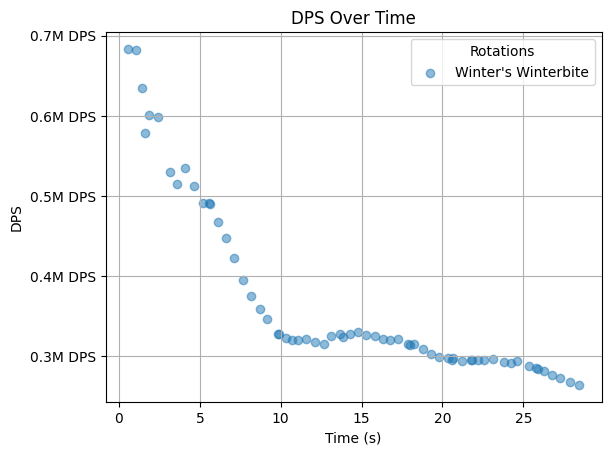

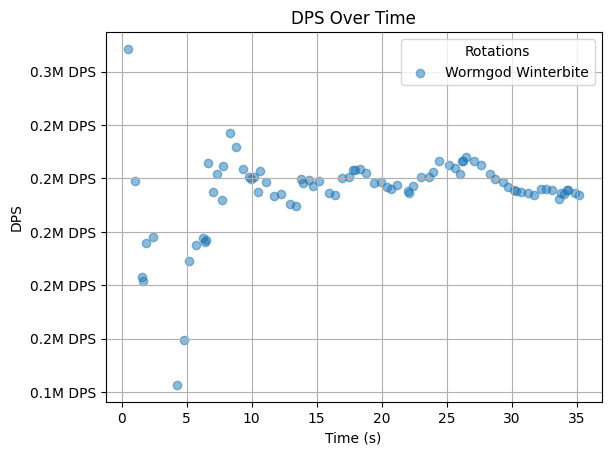

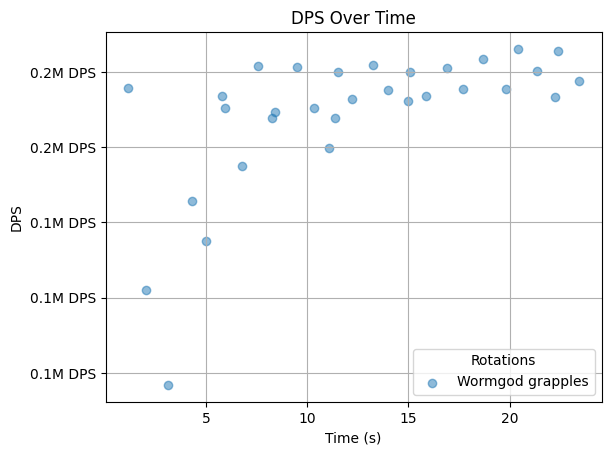

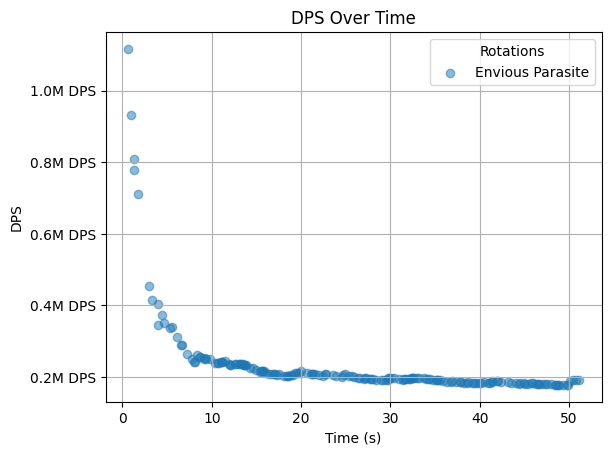

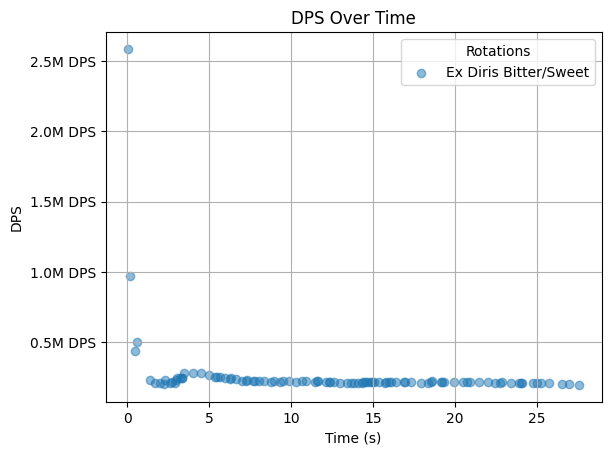

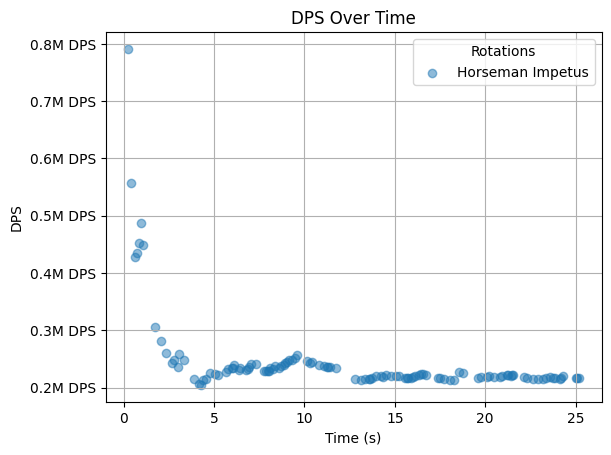

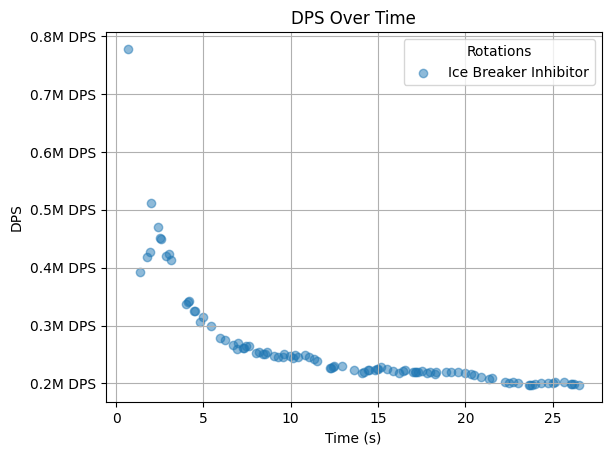

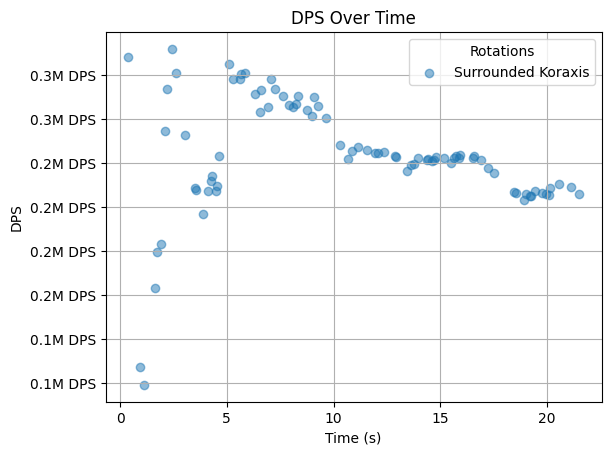

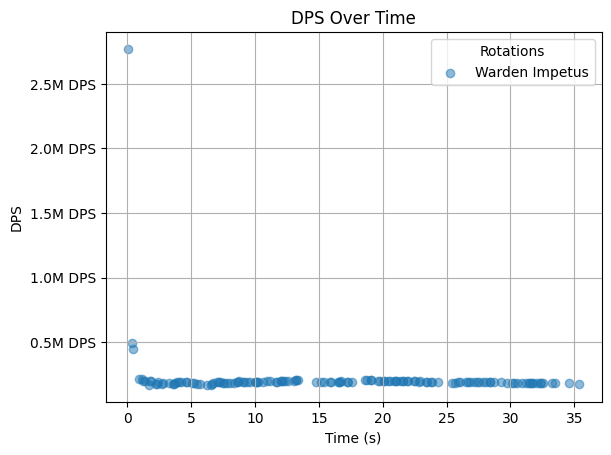

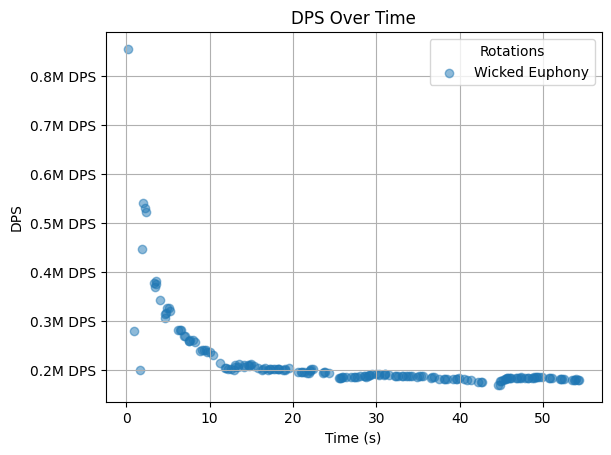

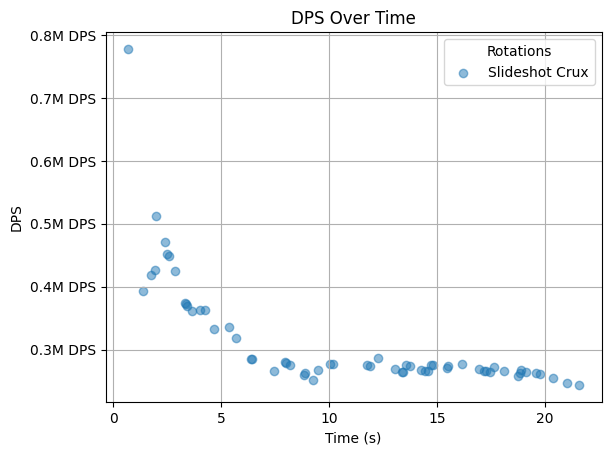

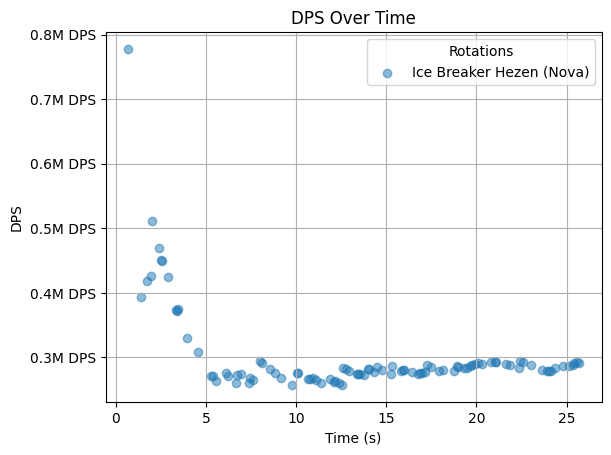

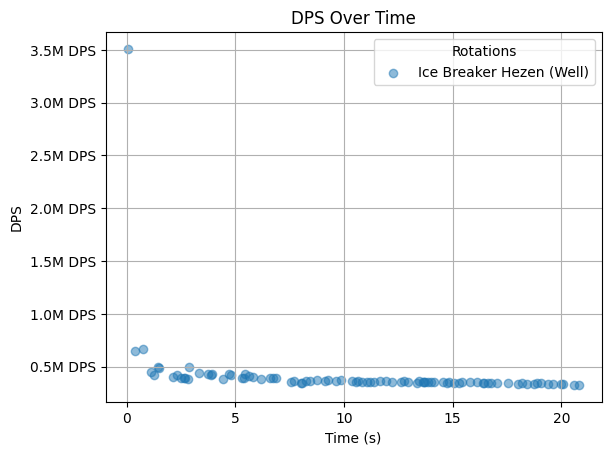

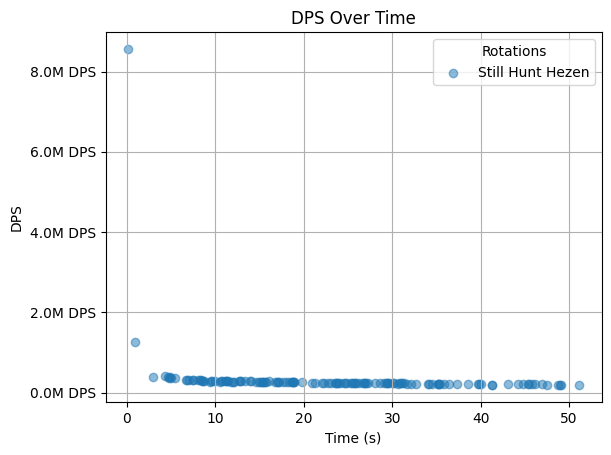

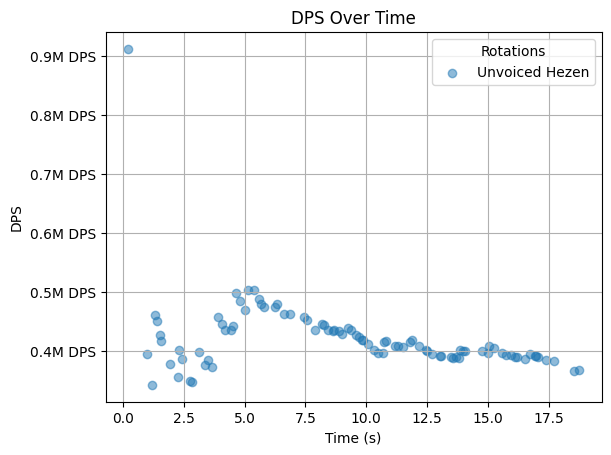

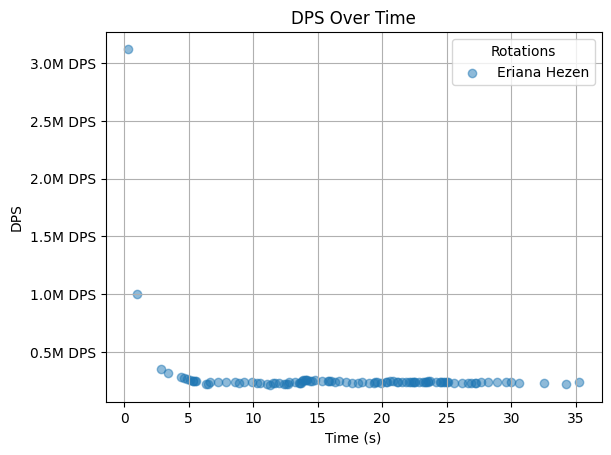

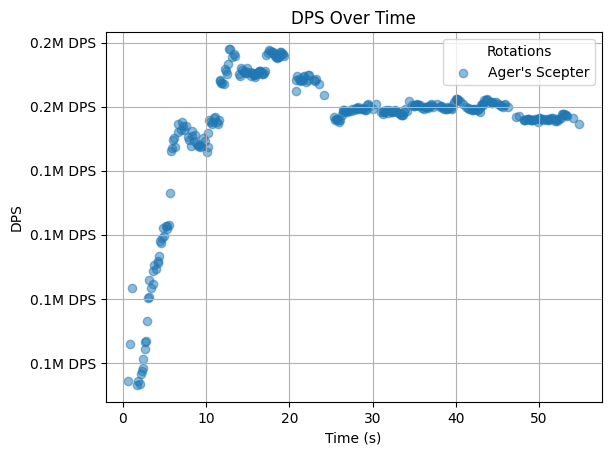

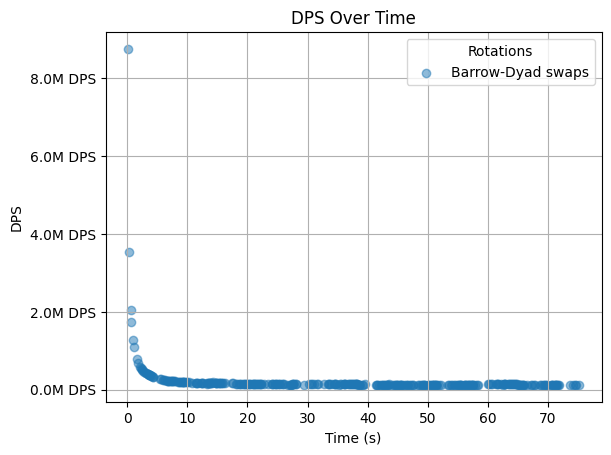

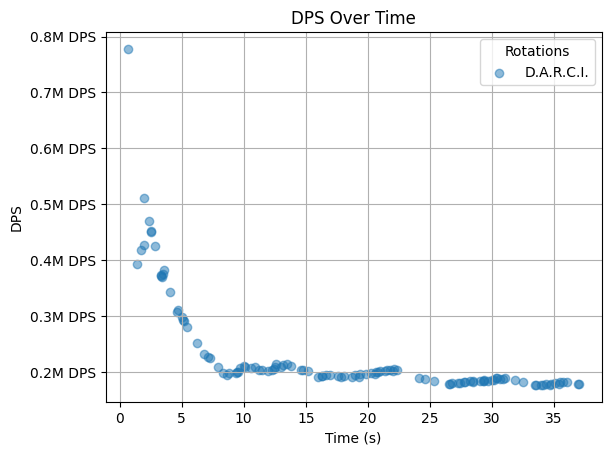

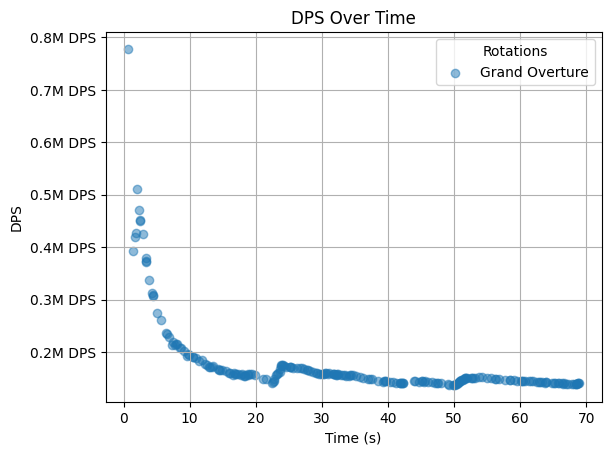

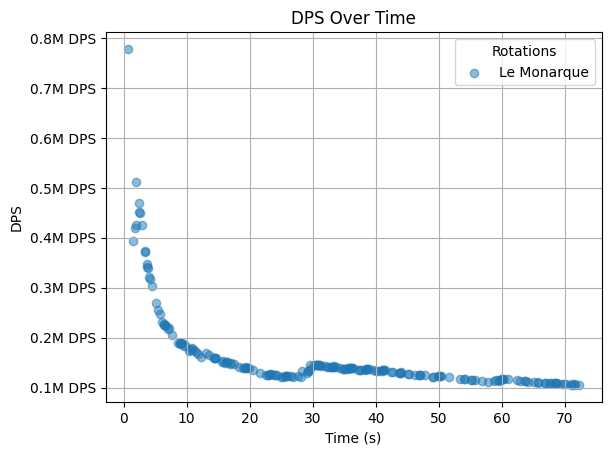

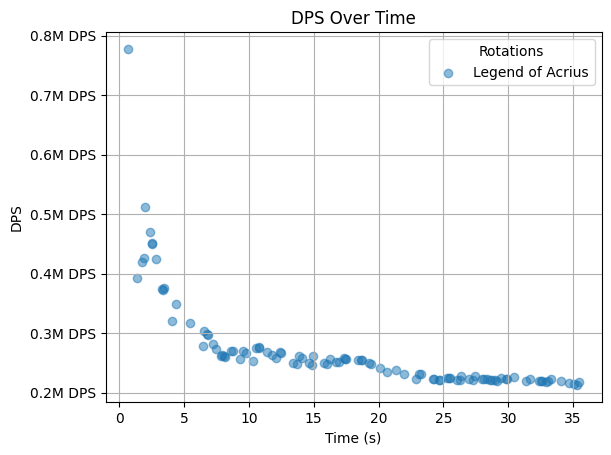

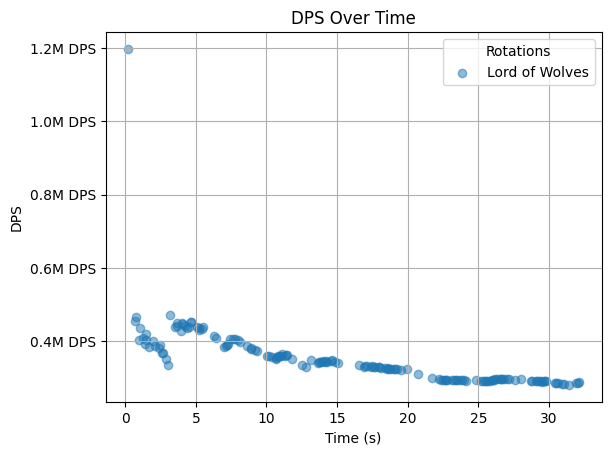

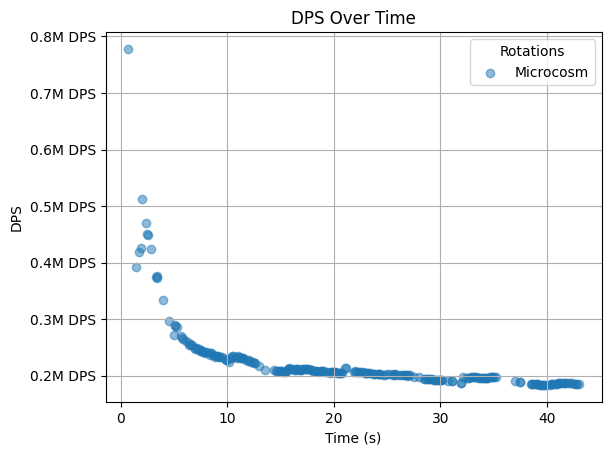

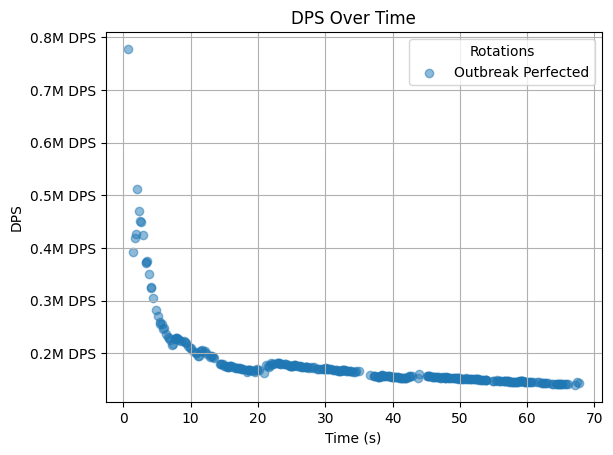

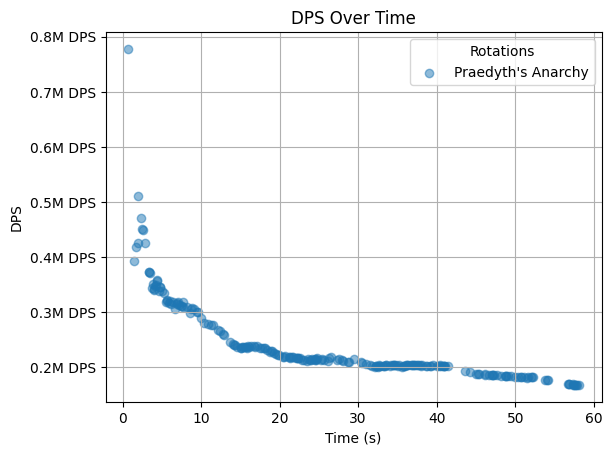

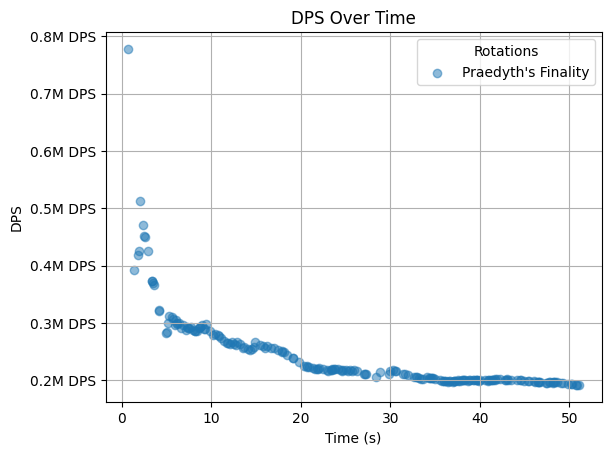

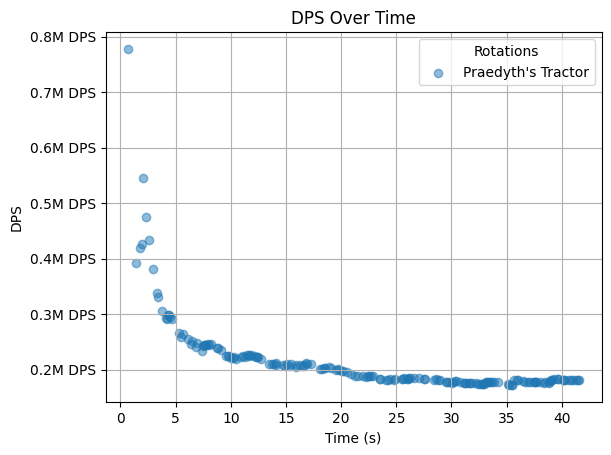

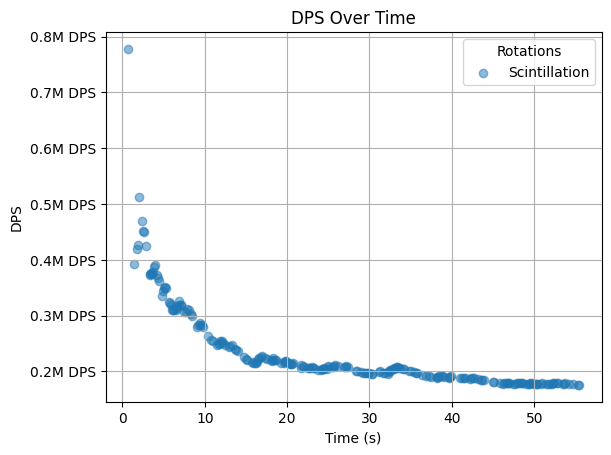

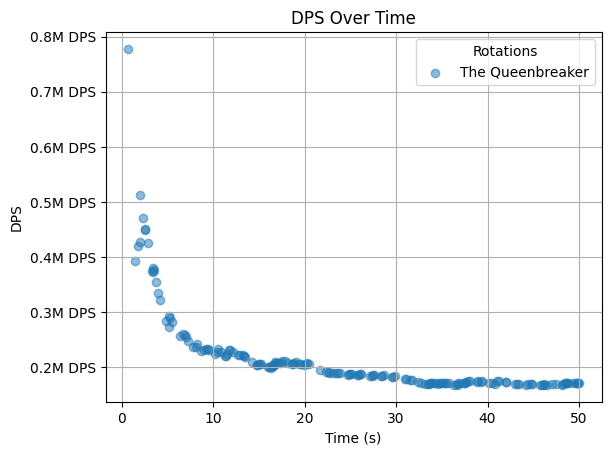

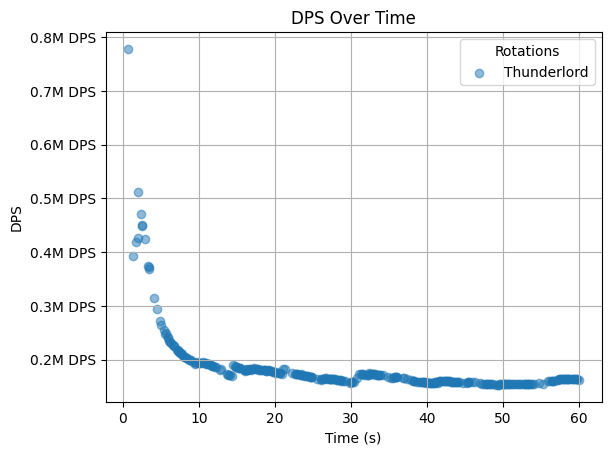

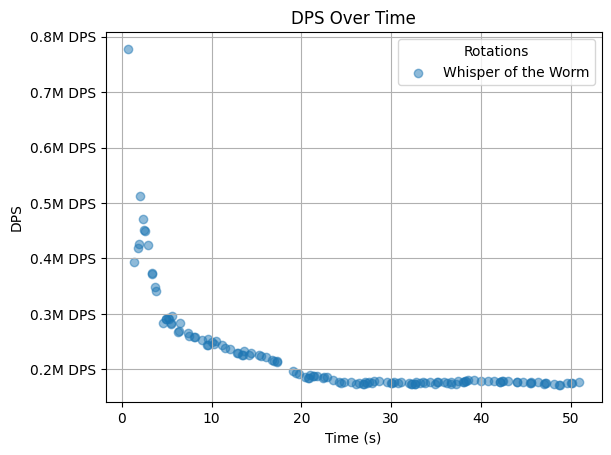

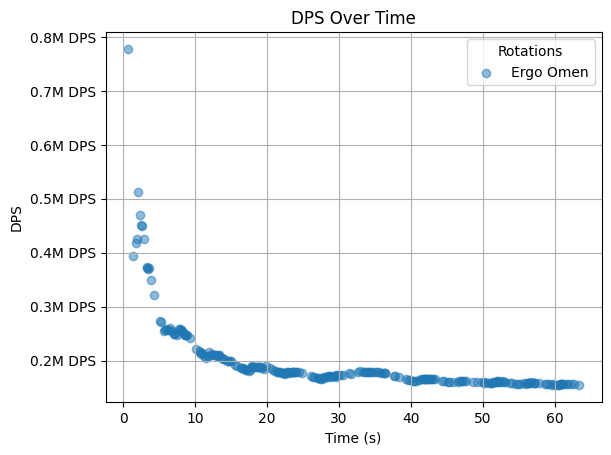

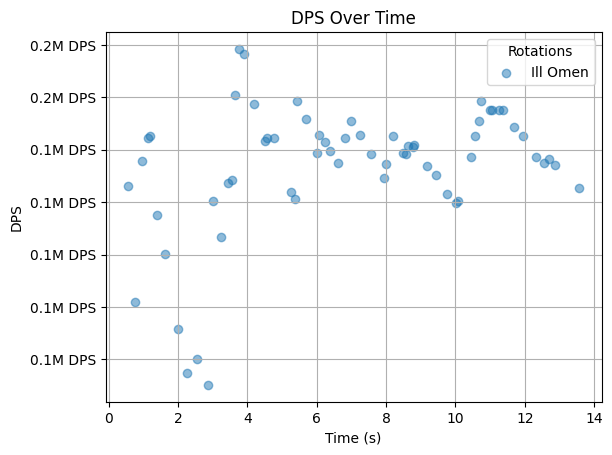

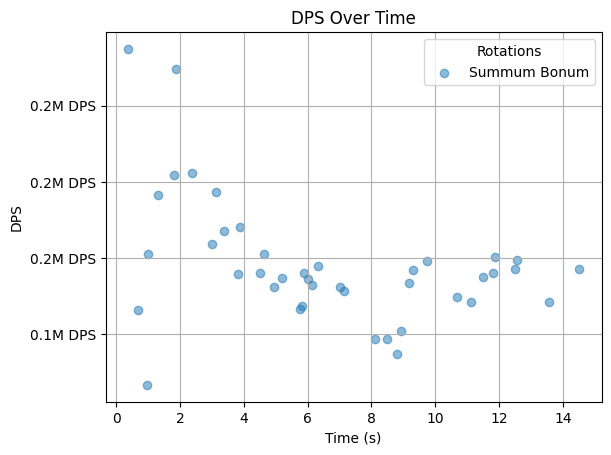

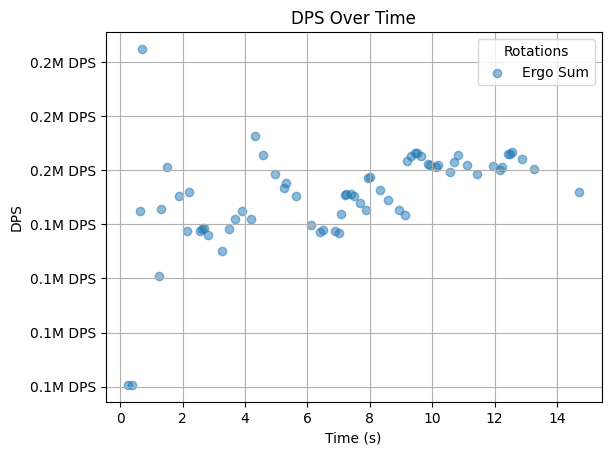

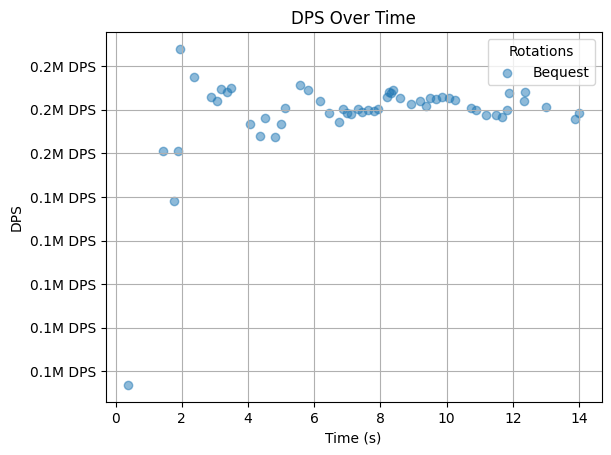

In [90]:
dmg_data = pd.read_excel('Damge Over Time.xlsx')

dmg_data.fillna(0, inplace=True)
dmg_data.set_index('Time (s)', inplace=True)

columns = dmg_data.columns.to_list()
rotations = {}
for column in columns:
    df = dmg_data.copy()
    df = df[[column]]
    df = df[df[f'{column}'].diff() != 0]
    df[f'{column} (DPS)'] = df[f'{column}'] / df.index.to_series()
    df[f'{column} (DPS)'] = np.where(df[f'{column}'] <= 0, 0, df[f'{column} (DPS)'])
    df = df[df[f'{column} (DPS)'] != 0]
    rotations[f'{column}'] = df

first_three_rotations = dict(list(rotations.items())[:3])

for column, df in first_three_rotations.items():
    plt.scatter(df.index, df[f'{column} (DPS)'], label=column, alpha=0.5)

dps_plot()

for column, df in rotations.items():
    plt.scatter(df.index, df[f'{column} (DPS)'], label=column, alpha=0.5)

    dps_plot()